In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [201]:
import cufflinks as cf
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
ad = pd.read_csv('/Users/user/Desktop/Progress/1/Udemy - Python for Data Science and Machine Learning/17. Logistic Regression/13-Logistic-Regression/advertising.csv')

In [5]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 62.6+ KB


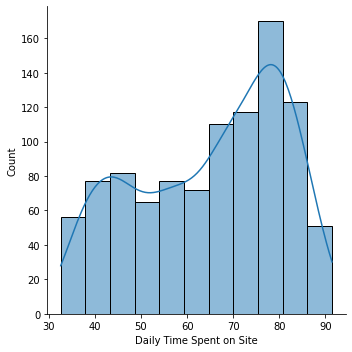

In [9]:
sns.displot(ad['Daily Time Spent on Site'],kde=True)

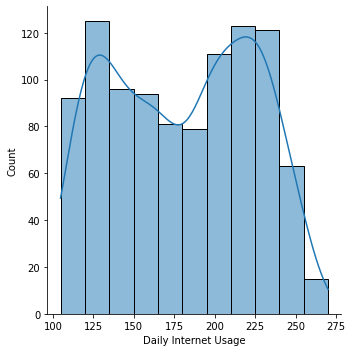

In [11]:
sns.displot(ad['Daily Internet Usage'],kde=True)

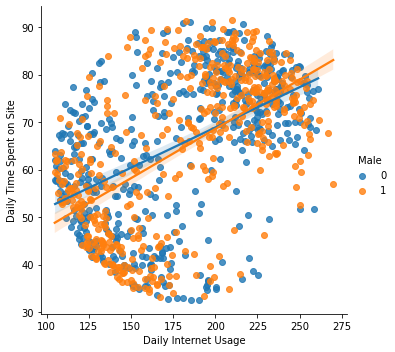

In [12]:
sns.lmplot(data=ad,x='Daily Internet Usage',y='Daily Time Spent on Site',hue='Male')

In [13]:
ad_copy = ad.drop(['Ad Topic Line','City','Country'],inplace=False,axis=1)

In [14]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


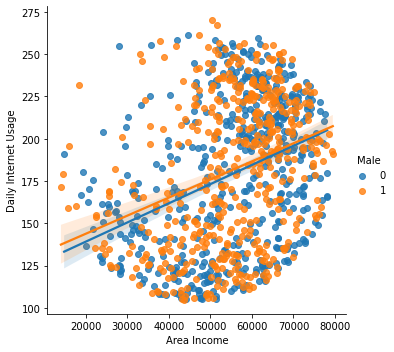

In [15]:
sns.lmplot(data=ad,x='Area Income',y='Daily Internet Usage',hue='Male')

In [16]:
ad_copy['Area Income'][ad_copy['Male']==1].sum()

26463858.68

In [17]:
ad_copy['Area Income'][ad_copy['Male']==0].sum()

28536141.4

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

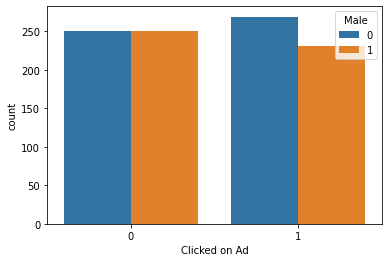

In [24]:
sns.countplot(x='Clicked on Ad',hue='Male',data=ad_copy)

In [30]:

ad_copy['Timestamp'] = ad_copy['Timestamp'].apply(pd.to_datetime)

ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


In [38]:
dmap = {0:'Mon',1:'Tue', 2:'Wed',3:'Thur', 4:'Fri',5:'Sat',6:'Sun'}
ad_copy['Day'] = ad_copy['Timestamp'].apply(lambda x: x.dayofweek)
ad_copy['Day'] = ad_copy['Day'].map(dmap)

In [39]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,Sun
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,Mon
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,Sun
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,Sun
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,Fri


<AxesSubplot:xlabel='Day', ylabel='count'>

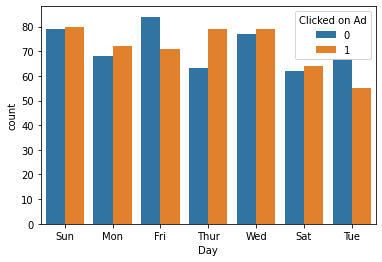

In [35]:
sns.countplot(data=ad_copy,x='Day',hue='Clicked on Ad')

In [40]:
ad_copy['Hour'] = ad_copy['Timestamp'].apply(lambda x: x.hour)


In [41]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,Sun,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,Mon,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,Sun,20
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,Sun,2
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,Fri,3


In [44]:
byHour = ad_copy.groupby('Hour',as_index=False).count()

In [43]:
byHour

,Hour,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day
0,0,45,45,45,45,45,45,45,45
1,1,32,32,32,32,32,32,32,32
2,2,36,36,36,36,36,36,36,36
3,3,42,42,42,42,42,42,42,42
4,4,42,42,42,42,42,42,42,42
5,5,44,44,44,44,44,44,44,44
6,6,39,39,39,39,39,39,39,39
7,7,54,54,54,54,54,54,54,54
8,8,43,43,43,43,43,43,43,43
9,9,49,49,49,49,49,49,49,49


In [202]:
byHour.iplot(kind='line',x='Hour',y='Clicked on Ad',title='By Hour')

<AxesSubplot:xlabel='Hour', ylabel='Day'>

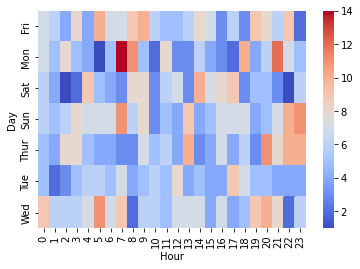

In [62]:
df = ad_copy.groupby(['Day','Hour']).count()['Age'].unstack()
df.head()
sns.heatmap(df,cmap='coolwarm')

In [65]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,Sun,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,Mon,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,Sun,20
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,Sun,2
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,Fri,3


In [71]:
weekend = ['Sat','Sun']
weekday = ['Mon','Tue','Wed','Thur','Fri']
def checker(ncols):
    for day in ad_copy['Day']:
        if day in weekend:
            ad_copy['Day'].replace(to_replace=day,value=0,inplace=True)
        elif day in weekday:
            ad_copy['Day'].replace(to_replace=day,value=1,inplace=True)
        else:
            pass

In [72]:
ad_copy['Day'].apply(checker)

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Name: Day, Length: 1000, dtype: object

In [73]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,0,20
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,0,2
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,1,3


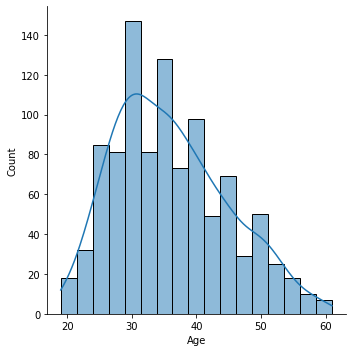

In [76]:
sns.displot(ad_copy['Age'],kde=True)

In [101]:
ad_copy['z_score_age'] = (ad_copy['Age']-ad_copy['Age'].mean())/ad_copy['Age'].std() 

In [102]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour,z_score_age,z_score_daily
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,0,-0.114848,1
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,1,-0.570140,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,0,20,-1.139255,1
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,0,2,-0.797786,1
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,1,3,-0.114848,1


In [103]:
def replaces(ncols):
    for item in ad_copy['z_score_age']:
        if item <-1:
            ad_copy['z_score_age'].replace(to_replace=item,value='Young',inplace=True)
        elif (item >-1) and (item<1):
            ad_copy['z_score_age'].replace(to_replace=item,value='Middle Age',inplace=True)
        elif item >1:
            ad_copy['z_score_age'].replace(to_replace=item,value='Old',inplace=True)
        else:
            pass

ad_copy['z_score_age'].apply(replaces)

TypeError: '<' not supported between instances of 'str' and 'int'

In [104]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour,z_score_age,z_score_daily
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,0,Middle Age,1
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,1,Middle Age,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,0,20,Young,1
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,0,2,Middle Age,1
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,1,3,Middle Age,1


In [105]:
def replace(ncols):
    for item in ad_copy['z_score_age']:
        if item == 'Young':
            ad_copy['z_score_age'].replace(to_replace=item,value=0,inplace=True)
        elif item == 'Middle Age':
            ad_copy['z_score_age'].replace(to_replace=item,value=1,inplace=True)
        elif item == 'Old' :
            ad_copy['z_score_age'].replace(to_replace=item,value=2,inplace=True)
        else:
            pass
ad_copy['z_score_age'].apply(replace)

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Name: z_score_age, Length: 1000, dtype: object

In [106]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour,z_score_age,z_score_daily
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,0,1,1
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,1,1,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,0,20,0,1
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,0,2,1,1
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,1,3,1,1


In [107]:
ad_copy['z_score_daily'] = (ad_copy['Daily Time Spent on Site']-ad_copy['Daily Time Spent on Site'].mean())/ad_copy['Daily Time Spent on Site'].std() 

In [108]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour,z_score_age,z_score_daily
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,0,1,0.249142
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,1,1,0.960652
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,0,20,0,0.281942
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,0,2,1,0.577143
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,1,3,1,0.212557


In [116]:
def replacer(ncols):
    for item in ad_copy['z_score_daily']:
        if item <-1:
            ad_copy['z_score_daily'].replace(to_replace=item,value='Low',inplace=True)
        elif (item >-1) and (item<1):
            ad_copy['z_score_daily'].replace(to_replace=item,value='Mid',inplace=True)
        elif item >1:
            ad_copy['z_score_daily'].replace(to_replace=item,value='High',inplace=True)
        else:
            pass

ad_copy['z_score_daily'].apply(replacer)

TypeError: '<' not supported between instances of 'str' and 'int'

In [117]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour,z_score_age,z_score_daily
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,0,1,Mid
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,1,1,Mid
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,0,20,0,Mid
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,0,2,1,Mid
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,1,3,1,Mid


In [118]:
def replac(ncols):
    for item in ad_copy['z_score_daily']:
        if item == 'Low':
            ad_copy['z_score_daily'].replace(to_replace=item,value=0,inplace=True)
        elif item == 'Mid':
            ad_copy['z_score_daily'].replace(to_replace=item,value=1,inplace=True)
        elif item == 'High' :
            ad_copy['z_score_daily'].replace(to_replace=item,value=2,inplace=True)
        else:
            pass
ad_copy['z_score_daily'].apply(replac)

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Name: z_score_daily, Length: 1000, dtype: object

In [119]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour,z_score_age,z_score_daily
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,0,1,1
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,1,1,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,0,20,0,1
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,0,2,1,1
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,1,3,1,1


In [126]:
ad_copy['z_score_income'] = (ad_copy['Area Income']-ad_copy['Area Income'].mean())/ad_copy['Area Income'].std() 

In [127]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour,z_score_age,z_score_daily,z_score_income
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,0,1,1,0.509436
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,1,1,1,1.002029
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,0,20,0,1,0.356770
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,0,2,1,1,-0.014448
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,1,3,1,1,1.408163


In [128]:
def repla(ncols):
    for item in ad_copy['z_score_income']:
        if item <-1:
            ad_copy['z_score_income'].replace(to_replace=item,value='Low',inplace=True)
        elif (item >-1) and (item<1):
            ad_copy['z_score_income'].replace(to_replace=item,value='Mid',inplace=True)
        elif item >1:
            ad_copy['z_score_income'].replace(to_replace=item,value='High',inplace=True)
        else:
            pass

ad_copy['z_score_income'].apply(repla)

TypeError: '<' not supported between instances of 'str' and 'int'

In [129]:
def repl(ncols):
    for item in ad_copy['z_score_income']:
        if item == 'Low':
            ad_copy['z_score_income'].replace(to_replace=item,value=0,inplace=True)
        elif item == 'Mid':
            ad_copy['z_score_income'].replace(to_replace=item,value=1,inplace=True)
        elif item == 'High' :
            ad_copy['z_score_income'].replace(to_replace=item,value=2,inplace=True)
        else:
            pass
ad_copy['z_score_income'].apply(repl)

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Name: z_score_income, Length: 1000, dtype: object

In [130]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour,z_score_age,z_score_daily,z_score_income
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,0,1,1,1
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,1,1,1,2
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,0,20,0,1,1
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,0,2,1,1,1
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,1,3,1,1,2


In [138]:
ad_copy['z_score_usage'] = (ad_copy['Daily Internet Usage']-ad_copy['Daily Internet Usage'].mean())/ad_copy['Daily Internet Usage'].std() 

In [139]:
ad_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Day,Hour,z_score_age,z_score_daily,z_score_income,z_score_usage
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,0,1,1,1,1.733163
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,1,1,1,2,0.313648
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,0,20,0,1,1,1.286945
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,0,2,1,1,1,1.500829
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,1,3,1,1,2,1.038211


In [140]:
def rep(ncols):
    for item in ad_copy['z_score_usage']:
        if item <-1:
            ad_copy['z_score_usage'].replace(to_replace=item,value='Low',inplace=True)
        elif (item >-1) and (item<1):
            ad_copy['z_score_usage'].replace(to_replace=item,value='Mid',inplace=True)
        elif item >1:
            ad_copy['z_score_usage'].replace(to_replace=item,value='High',inplace=True)
        else:
            pass

ad_copy['z_score_usage'].apply(rep)

TypeError: '<' not supported between instances of 'str' and 'int'

In [141]:
def re(ncols):
    for item in ad_copy['z_score_usage']:
        if item == 'Low':
            ad_copy['z_score_usage'].replace(to_replace=item,value=0,inplace=True)
        elif item == 'Mid':
            ad_copy['z_score_usage'].replace(to_replace=item,value=1,inplace=True)
        elif item == 'High' :
            ad_copy['z_score_usage'].replace(to_replace=item,value=2,inplace=True)
        else:
            pass
ad_copy['z_score_usage'].apply(re)

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Name: z_score_usage, Length: 1000, dtype: object

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve,confusion_matrix

In [191]:
x = ad_copy[['Day','z_score_age','Male','z_score_daily','z_score_income','z_score_usage']]
#x = ad_copy[['Day','Daily Time Spent on Site','Age','Area Income','Male','Daily Internet Usage']]
y = ad_copy['Clicked on Ad']
lr = LogisticRegression()

In [192]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [193]:
lr.fit(x_train,y_train)

LogisticRegression()

In [195]:
predictions = lr.predict(x_test)

In [196]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        92
           1       0.95      0.89      0.92       108

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



In [177]:
y_predict = lr.predict_proba(x_test)[::,1]
fpr,tpr,_ = roc_curve(y_test,y_predict)

Text(0.5, 0, 'False Positive Rate')

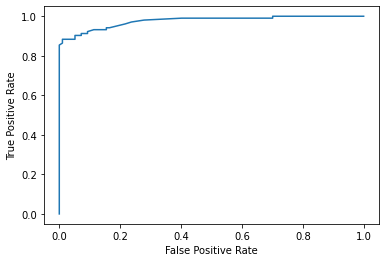

In [198]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [197]:
print(confusion_matrix(y_test,predictions))

[[87  5]
 [12 96]]
